In [8]:
from A00omics2pathlist import omics2pathlist
from A04stage1 import stage1
from A05stage2 import stage2
import pandas as pd
import json
import time
import yaml
from A03supp_age import ageTransfer, antiAgeTransfer
from tqdm import tqdm
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

startread = time.time()
with open('./config.yml', 'r') as file:
     root = yaml.safe_load(file)
pathCommon = root["pathway"]["common"]
SchizophreniaResult = root["pathway"]["result"]
basic = root["pathway"]["basic"]
controlPath = SchizophreniaResult.format('Ridge/tianChiData4Stage2.csv')
casePath = SchizophreniaResult.format('RidgeAnalysis/tianChiCaseData4Stage2.csv')


In [ ]:
startread = time.time()

with open('./config.yml', 'r') as file:
     root = yaml.safe_load(file)
pathCommon = root["pathway"]["common"]
SchizophreniaResult = root["pathway"]["result"]
basic = root["pathway"]["basic"]
controlPath = SchizophreniaResult.format('Ridge/tianChiData4Stage2.csv')
casePath = SchizophreniaResult.format('RidgeAnalysis/tianChiCaseData4Stage2.csv')

control = pd.read_csv(controlPath, index_col = 0)
case = pd.read_csv(casePath, index_col = 0)

data = pd.concat([control, case])



# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100, 50), (100, 100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 2000],
}

X_train = data.drop(columns = ["Age"])
y_train = data[["Age"]]
# Create the MLPRegressor model
mlp = MLPRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

testPath = SchizophreniaResult.format('RidgeAnalysis/tianChiTestData4Stage2.csv')
test = pd.read_csv(testPath, index_col = 0)
y_pred = best_model.predict(test.drop(columns = ["Age"])) 
resultData = pd.DataFrame(
  index = test.index, 
  columns = ["Prediction"],
  data = y_pred
  )
resultData["Prediction"] = resultData["Prediction"].apply(lambda x: antiAgeTransfer(x))
resultData.to_csv(SchizophreniaResult.format('DLAnalysis/tianChiTestPrediction.csv'))

,GO:0000002,GO:0000012,GO:0000027,GO:0000028,GO:0000038,GO:0000045,GO:0000050,GO:0000070,GO:0000076,GO:0000077,...,GO:2001234,GO:2001235,GO:2001237,GO:2001238,GO:2001240,GO:2001241,GO:2001243,GO:2001244,GO:2001256,Age
train15448,1.591159,1.406728,1.311632,1.508578,1.112887,1.465638,0.910412,1.344480,1.006757,1.068570,...,1.695986,1.863077,1.338500,1.634963,0.813114,0.829847,1.314576,1.343787,1.430392,1.190476
train12745,-0.916744,1.703261,1.141999,0.580891,1.457315,-0.261916,0.944262,0.522118,0.533523,0.499136,...,0.411983,0.332388,0.951924,0.405926,0.281373,1.718897,-0.374749,1.126466,1.568608,0.238095
train12170,0.667453,1.078129,0.823335,1.286444,1.018502,0.356013,1.083675,1.083797,0.941478,0.514948,...,0.726029,0.970845,0.789338,0.650805,0.885844,0.551944,0.707623,0.885250,1.045659,0.380952
train16823,1.078738,1.290612,0.780334,0.418586,1.156540,1.414873,1.844549,2.098804,0.920867,1.584112,...,1.615041,1.725474,1.701867,1.280314,1.551163,0.914430,1.620970,1.650454,1.094905,1.809524
train15473,1.641459,2.064904,2.853486,1.393183,1.949419,2.366776,1.939724,2.570200,2.059717,1.779048,...,1.971986,2.968937,2.033851,1.763287,2.609444,2.865716,2.201277,2.366918,1.456300,2.295238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train18229,2.800609,2.093585,3.439752,1.755912,2.325028,2.397924,2.483364,2.937762,2.064251,3.821935,...,2.380457,2.303885,2.596843,2.324321,1.646641,2.296617,2.037847,3.499704,2.285302,2.571429
train18230,3.468987,2.685666,3.009699,1.937612,1.445136,2.737624,2.542662,2.735904,2.003412,3.077695,...,2.694386,1.875697,2.983144,2.424393,2.248101,1.774752,2.470614,4.039204,2.233477,2.571429
train18231,2.772712,2.617017,3.211829,2.551218,3.168608,3.212707,2.712991,2.874972,2.349574,2.765527,...,2.885850,2.966675,3.016523,3.344504,3.748968,2.628990,3.392075,3.100877,2.655458,2.904762
train18232,1.813252,2.085767,2.907084,3.170272,2.102585,2.425887,2.515876,2.900474,2.672521,3.175791,...,2.969187,2.294297,2.851775,2.164113,2.622375,2.808945,2.825435,3.281584,2.327217,2.238095


/home/lipan230/miniconda3/envs/pyBioTrans/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lipan230/miniconda3/envs/pyBioTrans/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lipan230/miniconda3/envs/pyBioTrans/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lipan230/miniconda3/envs/pyBioTrans/lib/python3.9/si

In [ ]:
best_params

,GO:0000002,GO:0000012,GO:0000027,GO:0000028,GO:0000038,GO:0000045,GO:0000050,GO:0000070,GO:0000076,GO:0000077,...,GO:2001234,GO:2001235,GO:2001237,GO:2001238,GO:2001240,GO:2001241,GO:2001243,GO:2001244,GO:2001256,Age
test10001,2.818827,2.861389,2.761580,2.355887,1.754847,2.788086,2.534186,2.445055,2.255913,2.451382,...,3.024432,2.555238,2.745494,2.749195,2.912860,2.262200,2.756173,2.380268,2.329455,0
test10002,2.776687,2.519016,2.869927,3.053997,3.404039,2.737568,3.286650,3.401399,2.137563,2.649132,...,3.405654,3.769574,3.444987,2.936242,2.842808,2.587848,3.444131,2.304243,2.255076,0
test10003,3.609570,2.948609,3.249768,2.492554,2.982392,2.729808,3.211742,2.890515,2.497531,3.489997,...,3.160970,2.095477,3.091658,2.544948,2.695939,2.421587,3.077961,3.264144,3.954748,0
test10004,2.839861,4.247269,2.943722,2.956405,2.783543,2.867088,2.293156,2.864280,3.059579,3.325393,...,2.600032,3.011520,2.297302,3.321483,2.899333,3.676347,2.707356,3.117570,2.993480,0
test10005,2.604822,2.885612,2.780352,2.762338,2.548279,3.030148,3.288360,3.306400,2.414342,3.642516,...,3.001009,3.024292,2.934069,3.043967,2.983637,3.411469,3.185660,3.041278,2.288658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test12059,2.441952,2.040019,1.847001,3.841249,2.751328,2.589816,2.373745,3.043321,2.707193,2.235287,...,2.531697,2.484792,3.114802,1.710985,2.832580,2.688381,2.886239,3.163798,2.493286,0
test12060,3.326027,2.235082,2.633880,2.129075,1.234987,2.212955,3.100938,2.492477,2.202863,3.274911,...,2.576368,2.293753,2.634123,2.312284,2.759877,1.863259,2.851901,3.248454,2.246570,0
test12061,2.897435,2.322166,3.762095,2.671568,2.780462,3.246890,2.456886,2.853604,2.858850,2.505391,...,2.437068,2.982041,3.214612,3.143075,3.487046,2.677509,2.979181,3.643104,2.583963,0
test12062,2.075691,1.644137,2.443185,2.191715,2.474374,2.647809,2.319228,2.828121,2.222485,3.089623,...,2.547041,2.453954,2.700511,2.307057,2.188752,2.434082,2.333277,3.800032,1.699054,0


In [9]:
DL = SchizophreniaResult.format('DLAnalysis/tianChiTestPrediction.csv')
DL = pd.read_csv(DL, index_col = 0)
DL

,Prediction
test10001,77.324192
test10002,78.984174
test10003,76.324776
test10004,79.300424
test10005,80.272419
...,...
test12059,65.514644
test12060,71.428210
test12061,83.467722
test12062,67.363328


In [10]:
TianChiPrediction = SchizophreniaResult.format('RidgeAnalysis/tianChiTestPrediction.csv')
TianChiPrediction = pd.read_csv(TianChiPrediction, index_col = 0)
TianChiPrediction

,prediction,Age
test10001,85.522755,20
test10002,88.478717,20
test10003,84.836108,20
test10004,84.582639,20
test10005,86.623200,20
...,...,...
test12059,74.278423,20
test12060,69.403011,20
test12061,84.386806,20
test12062,67.580144,20


In [ ]:
csv_files = [
    "testdata.csv",
    "traindata.csv",
    "testmap.csv",
    "trainmap.csv"
]
read_file_chunk_size = 500000

def read_csv_chunk(input_file_path,
                   chunk_size: int = 1000) -> pd.DataFrame:
    if  str(input_file_path)[-3:] == "csv":
         df_chunk = [i for i in tqdm(pd.read_csv(input_file_path,
                                            chunksize=chunk_size))]
         return pd.concat(df_chunk)
    else:
        # f = pd.read_pickle
        return pd.read_pickle(input_file_path)
  
testdata, traindata, testmap, trainmap = [read_csv_chunk(pathCommon.format(i),
                                          chunk_size=read_file_chunk_size)
                                          for i in csv_files]
    

In [4]:
testdata

,Unnamed: 0,test10001,test10002,test10003,test10004,test10005,test10006,test10007,test10008,test10009,...,test12054,test12055,test12056,test12057,test12058,test12059,test12060,test12061,test12062,test12063
0,cg02494853,-4.2476,-4.2476,-4.4026,-3.9390,-4.2476,-4.6905,-4.1780,-4.4026,-4.5853,...,-3.8374,-3.6597,-3.8869,-3.4392,-3.5077,-3.5077,-3.9390,-2.8421,-2.9425,-4.0516
1,cg03706273,-4.6905,-4.5853,-4.4026,-3.9390,-4.3222,-4.1780,-4.0516,-4.3222,-4.4899,...,-3.5437,-4.2476,-3.5437,-2.9013,-2.3498,-1.8827,-3.3748,-3.0764,-2.6647,-3.8869
2,cg04023335,0.0560,0.1684,-2.2187,-1.9729,0.1001,-0.2330,-2.0204,-1.9361,-1.9092,...,1.0457,-0.6145,-1.8483,-2.1635,-1.5711,-1.8230,0.3722,0.8376,0.8093,0.3639
3,cg05213048,1.1090,1.3427,-0.0080,0.3680,0.7720,1.1144,0.2492,0.4054,0.5150,...,1.7658,0.9843,1.2193,2.3373,0.5579,0.2492,1.7107,2.4144,1.4175,1.1634
4,cg15295597,-4.3222,-3.9390,-3.8374,-3.1757,-5.0935,-3.8374,-3.8374,-3.7448,-4.9407,...,-3.2289,-3.2020,-3.3140,-3.2565,-2.8044,-3.1757,-3.4392,-2.8044,-2.4687,-3.5437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330341,ch.22.43177094F,-0.4263,-0.6765,-0.9393,-1.2947,-0.9893,-0.7444,-1.1744,-1.0561,-0.6855,...,-6.8115,-9.2104,-9.2104,-6.8115,-9.2104,-6.8115,-9.2104,-9.2104,-6.8115,-6.8115
330342,ch.22.46830341F,2.1963,2.2301,2.2766,2.2885,2.2416,1.8230,2.4277,1.6066,2.0399,...,-5.0935,-4.9407,-5.7734,-5.2736,-4.3222,-5.0935,-6.1639,-5.2736,-5.0935,-4.9407
330343,ch.22.1008279F,-2.7324,-2.6008,-2.8615,-2.6813,-3.5077,-2.9425,-3.0300,-3.2849,-3.6196,...,-6.1639,-6.1639,-6.1639,-4.5853,-4.6905,-5.0935,-5.7734,-5.7734,-5.7734,-5.7734
330344,ch.22.47579720R,-1.2137,-1.1090,-0.8281,-0.9542,-1.2770,-1.2829,-1.2422,-1.3066,-1.0302,...,-3.4729,-3.3140,-3.5810,-3.0074,-3.5437,-3.7448,-2.9425,-3.5437,-3.3748,-3.0764


In [7]:
testCofunder = testmap.set_index("sample_id")
testCofunder

,Unnamed: 0,gender
sample_id,,
test10001,1,M
test10002,2,M
test10003,3,F
test10004,4,F
test10005,5,M
...,...,...
test12059,2059,F
test12060,2060,M
test12061,2061,M


In [10]:
testingData = testdata.set_index("Unnamed: 0")
# testingData = traindata[caseSubject]
testingData = testingData.T
# testingData =  testingData.join(testCofunder[["age"]])
# testingData['Age'] = testingData['age'].apply(lambda x: ageTransfer(x))
testingData['Age'] = 0
# testingData = testingData.drop(columns = ["age"])
# testingData = pd.concat([testingData, testdata])
testingAge = testingData[["Age"]]

In [1]:
testingData

NameError: name 'testingData' is not defined

In [25]:
from A00omics2pathlist import omics2pathlist
from A04stage1 import stage1
from A05stage2 import stage2, stage2pediction
import pandas as pd
import time
import yaml
from tqdm import tqdm

import json
from A03supp_age import ageTransfer
import pandas as pd
from functools import reduce

with open('./config.yml', 'r') as file:
     root = yaml.safe_load(file)
pathCommon = root["pathway"]["common"]
SchizophreniaResult = root["pathway"]["result"]
basic = root["pathway"]["basic"]

csv_files = [
    "testdata.csv",
    "traindata.csv",
    "testmap.csv",
    "trainmap.csv"
]
read_file_chunk_size = 500000

def read_csv_chunk(input_file_path,
                   chunk_size: int = 1000) -> pd.DataFrame:
    if  str(input_file_path)[-3:] == "csv":
         df_chunk = [i for i in tqdm(pd.read_csv(input_file_path,
                                            chunksize=chunk_size))]
         return pd.concat(df_chunk)
    else:
        # f = pd.read_pickle
        return pd.read_pickle(input_file_path)
  
testdata, traindata, testmap, trainmap = [read_csv_chunk(pathCommon.format(i),
                                          chunk_size=read_file_chunk_size)
                                          for i in csv_files]

trainCofunder = trainmap.set_index("sample_id")
controlSubject = list(trainCofunder[trainCofunder.sample_type.eq("control")].index)
caseSubject = list(trainCofunder[trainCofunder.sample_type.ne("control")].index)

traindata = traindata.set_index("Unnamed: 0")
trainControlData = traindata[controlSubject]
trainingData = trainControlData.T
trainingData = trainingData.dropna()
trainingData =  trainingData.join(trainCofunder[["age"]])
trainingData['Age'] = trainingData['age'].apply(lambda x: ageTransfer(x))
trainingData = trainingData.drop(columns = ["age"])

testingData = traindata[caseSubject]
testingData = testingData.T
testingData =  testingData.join(trainCofunder[["age"]])
testingData['Age'] = testingData['age'].apply(lambda x: ageTransfer(x))
testingData = testingData.drop(columns = ["age"])
# testingData = pd.concat([testingData, testdata])
testingAge = testingData[["Age"]]

golist = basic.format("golist.json")
cpgAnno = basic.format("cpgAnno.csv")
cpgAnno = pd.read_csv(cpgAnno, index_col=0)
cpgAnno['entrezID'] = cpgAnno['entrezID'].astype(str)
with open(golist) as json_file:
    golist = json.load(json_file)

### step1 data processing
### we process the training and testing dataset together for saving time

predictionMode = "Ridge"
hyperParam = {
    "alphas": [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
    }
sampleMode = "CrossValidation"


selected_pairs = {key: golist[key] for key in list(golist)[:3000]}
selected_pairs_2 = {key: golist[key] for key in list(golist)[3000:6000]}
selected_pairs_3 = {key: golist[key] for key in list(golist)[6000:9000]}
selected_pairs_4 = {key: golist[key] for key in list(golist)[9000:12419]}
# selected_pairs = {key: golist[key] for key in list(golist)[:13]}
# selected_pairs_2 = {key: golist[key] for key in list(golist)[13:29]}
# selected_pairs_3 = {key: golist[key] for key in list(golist)[29:45]}
# selected_pairs_4 = {key: golist[key] for key in list(golist)[45:62]}
listOfGoList = [selected_pairs, selected_pairs_2, selected_pairs_3, selected_pairs_4]
data4Stage2All = []
data4Stage2ListlAll = []
path = SchizophreniaResult.format("RidgeAnalysis/tianChiCaseData4Stage2.csv")
data = pd.concat([trainingData, testingData])

for goList in listOfGoList: 
    omics2path = omics2pathlist(data, goList, cpgAnno)
    print(len(omics2path))
    omics2pathTraining = [element.loc[trainingData.index]  for element in omics2path]
    omics2pathData = [element.loc[testingData.index]  for element in omics2path]
    print(omics2pathTraining)
    data4Stage2 = stage1(
        training = omics2pathTraining[:5],
        testing = omics2pathData[:5],
        testingAge = testingAge,
        sampleMode = sampleMode,
        predictionMode = predictionMode,
        hyperParam = hyperParam,
        # path = path,
    )
    data4Stage2All.append(data4Stage2)
print(data4Stage2All)
data4Stage2Save = reduce(lambda df1,df2: pd.concat([df1.drop(columns = ["Age"]), df2], axis=1), data4Stage2All)
data4Stage2Save.to_csv(path)

predictFilePath = SchizophreniaResult.format("RidgeAnalysis/tianChiCaseData4Stage2.csv")
modelFilePath = SchizophreniaResult.format('Ridge/tianChiData4Stage2.csv')
savePath =  SchizophreniaResult.format('RidgeAnalysis/tianChiCasePrediction.csv')

stage2pediction(
    predictFilePath,
    modelFilePath,
    predictionMode,
    hyperParam,
    savePath,
)

,cg02494853,cg03706273,cg04023335,cg05213048,cg15295597,cg26520468,cg27539833,cg00008945,cg00011200,cg00011891,...,ch.22.569473R,ch.22.38010425R,ch.22.707968R,ch.22.740407F,ch.22.43177094F,ch.22.46830341F,ch.22.1008279F,ch.22.47579720R,ch.22.48274842R,Age
train10738,-4.9407,-4.8080,-1.8483,0.2859,-4.2476,3.7448,1.4626,-0.3350,0.0480,0.1643,...,-1.1469,-1.8568,-4.4026,-2.3624,-0.8376,2.3752,-2.4277,-1.3066,-2.1002,3.809524
train10739,-4.4026,-3.9938,-1.5227,0.6900,-4.0516,3.4392,1.6727,-0.5579,-0.1121,0.0160,...,-0.9893,-1.3673,-4.4026,-2.5701,-1.0666,1.4891,-3.2020,-0.9294,-1.9092,3.523810
train10740,-3.7900,-4.8080,-2.0301,0.4304,-4.8080,2.9854,1.6356,-0.4852,0.1845,0.0280,...,-0.9492,-2.0399,-4.1780,-1.4957,-1.2829,1.7419,-3.0529,-1.2479,-1.7419,2.904762
train10741,-4.3222,-5.4929,-2.0498,0.4388,-3.4729,3.7014,2.5402,-0.5321,-0.1322,-0.0200,...,-1.3611,-1.9917,-4.1129,-2.4826,-1.1856,3.2289,-2.7324,-1.4758,-2.0012,3.095238
train10742,-4.4899,-4.3222,-1.7819,0.2452,-3.4392,3.5810,1.8314,-0.4979,-0.1563,-0.1241,...,-1.0097,-1.6878,-5.2736,-1.9729,-0.6855,1.9917,-2.8231,-1.1360,-1.7982,2.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train16999,-4.5853,-4.4026,-2.1105,0.0961,-4.1129,3.1249,1.9729,-0.6189,0.0961,0.1161,...,-1.3488,-4.1129,-4.5853,-4.1129,-5.7734,-4.4026,-3.8374,-3.3140,-4.9407,-3.044522
train17000,-3.4729,-2.9854,0.1201,0.8376,-3.1757,3.7448,2.5701,-5.0935,-4.0516,-3.7900,...,-1.6652,-4.1129,-5.2736,-6.1639,-6.8115,-5.2736,-6.1639,-2.9013,-5.7734,2.590476
train17001,-4.1780,-3.7014,-0.1926,1.6652,-3.5437,2.6323,2.8421,-4.5853,-3.5437,-3.6597,...,-2.1420,-3.6196,-5.2736,-4.5853,-5.2736,-3.9938,-9.2104,-3.3140,-4.6905,2.333333
train17002,-3.2289,-2.5111,-1.9092,-0.0160,-3.0764,3.9938,2.8615,-0.4937,0.0560,0.2777,...,-2.0798,-4.1129,-4.6905,-4.4899,-5.4929,-5.2736,-6.8115,-3.4065,-3.9938,0.666667


In [32]:
for goList in listOfGoList: 
    omics2path = omics2pathlist(data, goList, cpgAnno)
    print(len(omics2path))
    omics2pathTraining = [element.loc[trainingData.index]  for element in omics2path]
    omics2pathData = [element.loc[testingData.index]  for element in omics2path]
    print(omics2pathTraining)
    data4Stage2 = stage1(
        training = omics2pathTraining[:5],
        testing = omics2pathData[:5],
        testingAge = testingAge,
        sampleMode = sampleMode,
        predictionMode = predictionMode,
        hyperParam = hyperParam,
        # path = path,
    )
    data4Stage2All.append(data4Stage2)
print(data4Stage2All)
data4Stage2Save = reduce(lambda df1,df2: pd.concat([df1.drop(columns = ["Age"]), df2], axis=1), data4Stage2All)
data4Stage2Save.to_csv(path)

predictFilePath = SchizophreniaResult.format("RidgeAnalysis/tianChiCaseData4Stage2.csv")
modelFilePath = SchizophreniaResult.format('Ridge/tianChiData4Stage2.csv')
savePath =  SchizophreniaResult.format('RidgeAnalysis/tianChiCasePrediction.csv')

stage2pediction(
    predictFilePath,
    modelFilePath,
    predictionMode,
    hyperParam,
    savePath,
)

963


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Best parameter:  100.0
Best parameter:  10.0
Best parameter:  10.0
Best parameter:  100.0
Best parameter:  100.0
848


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Best parameter:  10.0
Best parameter:  100.0
Best parameter:  100.0
Best parameter:  100.0


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [1]:
from A00omics2pathlist import omics2pathlist
from A04stage1 import stage1
from A05stage2 import stage2
import pandas as pd
import json
import time
import yaml
from A03supp_age import ageTransfer
from tqdm import tqdm

startread = time.time()

with open('./config.yml', 'r') as file:
     root = yaml.safe_load(file)
pathCommon = root["pathway"]["common"]


SchizophreniaResult = root["pathway"]["result"]
basic = root["pathway"]["basic"]
CasePath = SchizophreniaResult.format('RidgeAnalysis/tianChiCasePrediction.csv')

In [2]:
CasePath 

'/home/lipan230/code/pathwayAgeReduceRAMusage/tianChi/RidgeAnalysis/tianChiCasePrediction.csv'

In [3]:
case = pd.read_csv(CasePath)
case

,Unnamed: 0,prediction,Age
0,train10001,91.984837,88.0
1,train10002,92.496829,92.0
2,train10003,103.174712,93.0
3,train10004,94.942719,96.0
4,train10005,81.249375,91.0
...,...,...,...
1962,train18229,80.069477,74.0
1963,train18230,79.893545,74.0
1964,train18231,86.580297,81.0
1965,train18232,71.615277,67.0


In [1]:
def linearRegressionScore(X, y):
    # using linear regression score function to compute the r2
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    r_squared = model.score(X, y)
    return r_squared

def evaluation(predictionAge):
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    mean_squared_error = mean_squared_error(predictionAge["Age"].values, predictionAge["prediction"].values)
    mean_absolute_error = mean_absolute_error(predictionAge["Age"].values, predictionAge["prediction"].values)
    r2_score = linearRegressionScore(predictionAge[["Age"]], predictionAge[["prediction"]])
    dataCorr = predictionAge["Age"].corr(predictionAge['prediction'], method='pearson')
    return mean_squared_error, mean_absolute_error, r2_score, dataCorr


In [5]:

mean_squared_error, mean_absolute_error, r2_score, dataCorr = evaluation(case)
print("mean_squared_error: {}".format(mean_squared_error))
print("mean_absolute_error: {}".format(mean_absolute_error))
print("r2_score: {}".format(r2_score))
print("correlation: {}".format(dataCorr))

mean_squared_error: 37.903602991495646
mean_absolute_error: 4.416692862237472
r2_score: 0.9014950145862353
correlation: 0.949470912975345


In [2]:
TianChiPredictionV2 = SchizophreniaResult.format('RidgeAnalysis/tianChiTestV2Prediction.csv')
TianChiPrediction = SchizophreniaResult.format('RidgeAnalysis/tianChiTestPrediction.csv')
TianChiPredictionV2 = pd.read_csv(TianChiPredictionV2, index_col = 0)
TianChiPrediction = pd.read_csv(TianChiPrediction, index_col = 0)

TianChiPrediction

,prediction,Age
test10001,85.522755,20
test10002,88.478717,20
test10003,84.836108,20
test10004,84.582639,20
test10005,86.623200,20
...,...,...
test12059,74.278423,20
test12060,69.403011,20
test12061,84.386806,20
test12062,67.580144,20


In [3]:
TianChiPredictionV2

,prediction,Age
test10001,82.986042,20
test10002,86.512871,20
test10003,83.807120,20
test10004,83.481420,20
test10005,85.803769,20
...,...,...
test12059,72.944261,20
test12060,72.859297,20
test12061,85.253038,20
test12062,67.916624,20


In [3]:
import pandas as pd
def replace_negatives(x):
    if x < 0:
        return 0
    else:
        return x

prediction = "/home/lipan230/code/pathwayAgeReduceRAMusage/tianChi/RidgeAnalysis/tianChiTestV22Prediction.csv"
prediction = pd.read_csv(prediction)
prediction = prediction.drop(columns=["Age"])
prediction = prediction.rename(columns={"prediction": "age", "Unnamed: 0" :"sample_id"})
# prediction["sample_id"] = prediction.index
prediction["age"] = prediction[["age"]].applymap(replace_negatives)
prediction["age"] = prediction["age"].astype(float).round(2)
prediction['age'] = prediction['age'].apply(lambda s: '{:,.2f}'.format(s))
# prediction = prediction.astype(str)
print(prediction)
print(prediction.dtypes)
prediction.to_csv('submitV22.txt', sep=',', index=False)

      sample_id    age
0     test10001  83.22
1     test10002  87.00
2     test10003  83.93
3     test10004  83.84
4     test10005  85.41
...         ...    ...
2058  test12059  73.29
2059  test12060  73.14
2060  test12061  84.80
2061  test12062  67.66
2062  test12063  68.70

[2063 rows x 2 columns]
sample_id    object
age          object
dtype: object


In [2]:
from A00omics2pathlist import omics2pathlist
from A04stage1 import stage1
from A05stage2 import stage2, stage2pediction
import pandas as pd
import time
import yaml

import json
from A03supp_age import ageTransfer
import pandas as pd

startread = time.time()
# ### step0 import data
# ### 1. trainingData: control3000MethylData
# ### 2. testingData: phase3Control
# ### 3. testingAge: the biological Age of phase3Control
# ### 4. golist: dictionary key is the pathway, value is the genes associated with the pathway
# ### 5. cpgAnno: contains gene "entrezID" and the CpG sites "ID" aroud its gene

with open('./config.yml', 'r') as file:
     root = yaml.safe_load(file)

pathCommon = root["pathway"]["basic"]
SchizophreniaResult = root["pathway"]["result"]
pathControl3000  =  pathCommon.format("control3000MethylData.csv")
trainingData = pd.read_csv(pathControl3000, index_col="CpG")
trainingData = trainingData.T.dropna().astype(float)
trainingData['Age'] = trainingData['Age'].apply(lambda x: ageTransfer(x))
testingData = pathCommon.format("phase1-4MethylData.csv")
testingData = pd.read_csv(testingData, index_col="CpG")
testingData = testingData.T
testingData['Age'] = testingData['Age'].apply(lambda x: ageTransfer(x))
testingAge = testingData[["Age"]]
golist = pathCommon.format("golist.json")
cpgAnno = pathCommon.format("cpgAnno.csv")
cpgAnno = pd.read_csv(cpgAnno, index_col=0)
cpgAnno['entrezID'] = cpgAnno['entrezID'].astype(str)
with open(golist) as json_file:
    golist = json.load(json_file)

In [3]:
testingData

CpG,Age,cg05337607,cg16882684,cg10618823,cg05352250,cg14517133,cg18792365,cg22123915,cg16037806,cg05233311,...,cg14185104,cg12274479,cg03091027,cg23955417,cg15853117,cg08374499,cg12617598,cg05428701,cg00319545,cg23300267
9704031032_R02C01,-2.910991,0.8957,0.5651,0.9636,0.8878,0.5958,0.7756,0.9255,0.1153,0.0476,...,0.7398,0.8581,0.8534,0.3066,0.1792,0.6236,0.6767,0.1447,0.0756,0.7125
9704031032_R06C01,-2.028602,0.8615,0.5841,0.9574,0.9080,0.4797,0.7810,0.9016,0.1021,0.0405,...,0.8770,0.8137,0.9003,0.1964,0.0808,0.6237,0.6973,0.2089,0.0803,0.7044
9721367113_R06C01,-2.045994,0.8921,0.5748,0.9540,0.9082,0.5935,0.8461,0.9125,0.0868,0.0594,...,0.8194,0.8020,0.8845,0.2072,0.1328,0.6252,0.7306,0.1770,0.0887,0.7550
9721367113_R06C02,-3.044522,0.9023,0.5798,0.9487,0.9184,0.5332,0.8569,0.9295,0.0977,0.0464,...,0.8347,0.7475,0.8760,0.2726,0.1339,0.5285,0.7166,0.1666,0.1032,0.6983
9741779020_R01C02,-2.870169,0.8619,0.6128,0.9479,0.9055,0.6315,0.8452,0.9328,0.1468,0.0538,...,0.8554,0.8001,0.9095,0.1787,0.1439,0.5470,0.6842,0.1350,0.0893,0.7555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999547161_R03C02,-2.756840,0.8661,0.5174,0.9111,0.8793,0.6623,0.7401,0.9188,0.1090,0.0401,...,0.7307,0.7616,0.8878,0.3333,0.0947,0.3628,0.4981,0.1525,0.0752,0.6036
3999547161_R04C01,-2.953551,0.8875,0.5407,0.9452,0.8515,0.6683,0.8086,0.9035,0.1041,0.0456,...,0.8258,0.8547,0.9082,0.2385,0.0913,0.5399,0.6379,0.1396,0.0682,0.7084
3999547161_R04C02,-2.830948,0.8866,0.4998,0.8933,0.9192,0.5401,0.8555,0.9214,0.1102,0.0428,...,0.7881,0.8607,0.8915,0.2572,0.0993,0.4222,0.5740,0.1717,0.0864,0.7266
3999547161_R05C01,-2.870169,0.8765,0.5356,0.9427,0.9057,0.5284,0.8771,0.9176,0.1028,0.0424,...,0.8496,0.8409,0.8953,0.2116,0.0902,0.5450,0.7282,0.1427,0.0692,0.7882


In [ ]:
### step1 data processing
### we process the training and testing dataset together for saving time

sampleMode = "CrossValidation"
predictionMode = "Ridge"
hyperParam = {
    'alphas': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
}

selected_pairs = {key: golist[key] for key in list(golist)[:30]}
# selected_pairs_2 = {key: golist[key] for key in list(golist)[3000:6000]}
# selected_pairs_3 = {key: golist[key] for key in list(golist)[6000:9000]}
# selected_pairs_4 = {key: golist[key] for key in list(golist)[9000:12419]}
# listOfGoList = [selected_pairs, selected_pairs_2, selected_pairs_3, selected_pairs_4]
listOfGoList = [selected_pairs]

data4Stage2All = []
data4Stage2ListlAll = []

In [ ]:
for goList in listOfGoList: 
    data = pd.concat([trainingData, testingData])
    omics2path = omics2pathlist(data, golist, cpgAnno)
    print(len(omics2path))
    omics2pathTraining = [element.loc[trainingData.index]  for element in omics2path]
    omics2pathData = [element.loc[testingData.index]  for element in omics2path]
    endread = time.time()

    path = SchizophreniaResult.format("RidgeAnalysis/phase3Data4Stage2.csv")
    data4Stage2 = stage1(
        ### Here only use 5 GOs for demonstration
        training = omics2pathTraining[:5],
        testing = omics2pathData[:5],
        testingAge = testingAge,
        sampleMode = sampleMode,
        predictionMode = predictionMode,
        hyperParam = hyperParam,
        # path = path,
    )
    data4Stage2All.append(data4Stage2)
print(data4Stage2All)
data4Stage2Save = reduce(lambda df1,df2: pd.concat([df1.drop(columns = ["Age"]), df2], axis=1), data4Stage2All)
data4Stage2Save.to_csv(path)

In [ ]:
predictFilePath = SchizophreniaResult.format("RidgeAnalysis/phase3Data4Stage2.csv")
modelFilePath = SchizophreniaResult.format('Ridge/control3000Data4Stage2.csv')
savePath =  SchizophreniaResult.format('RidgeAnalysis/phase3Prediction.csv')

stage2pediction(
    predictFilePath,
    modelFilePath,
    predictionMode,
    hyperParam,
    savePath,
)

In [2]:
import pandas as pd

path = "/home/preCNS/epigenome/dnaMethyl/aging/cov.nspt.3523.for.chen.xlsx"
confunder = pd.read_excel(path)
confunder['ID'] = 'X' + confunder['ID'].astype(str)
confunder["Female"] =  confunder["sex"].astype(int).map({1:0, 2:1})
confunder

,ID,slide,array,age,sex,batch,B,NK,CD4T,CD8T,...,CigarettePerDay,YearQuitSmoking,CigarettePerDayBeforeQuit,YearsOfSomking,FrequentSecondHandSmokeExpo,AvgSecondHandSmoke,SpiritDrinking,BeerDrinking,Slide_Position,Female
0,X15HanTZ0001,204087940135,R02C01,50,2,batch2,0.000000,0.216044,0.001651,0.196017,...,NaN,NaN,NaN,NaN,Yes,2.0,0.0,0.0,204087940135_R02C01,1
1,X15HanTZ0002,204087890019,R03C01,49,2,batch2,0.011885,0.183755,0.004100,0.199984,...,NaN,NaN,NaN,NaN,Yes,15.0,0.0,0.0,204087890019_R03C01,1
2,X15HanTZ0005,204087880096,R03C01,67,1,batch2,0.012388,0.240700,0.176428,0.000000,...,10.0,NaN,NaN,NaN,Yes,11.0,3.0,3.0,204087880096_R03C01,0
3,X15HanTZ0006,204087880086,R08C01,63,2,batch2,0.005473,0.170588,0.031548,0.088610,...,NaN,NaN,NaN,NaN,Yes,20.0,0.0,0.0,204087880086_R08C01,1
4,X15HanTZ0007,204087890088,R07C01,56,2,batch2,0.000000,0.102173,0.021077,0.041131,...,NaN,NaN,NaN,NaN,No,NaN,0.0,0.0,204087890088_R07C01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,X19HanTZ1122,204087940067,R04C01,22,2,batch2,0.015230,0.075326,0.018757,0.074806,...,NaN,NaN,NaN,NaN,No,NaN,0.0,0.0,204087940067_R04C01,1
3519,X19HanTZ1123,204087950026,R07C01,21,2,batch2,0.078968,0.054399,0.116585,0.129792,...,NaN,NaN,NaN,NaN,No,NaN,0.0,0.0,204087950026_R07C01,1
3520,X19HanTZ1124,204088020141,R07C01,31,2,batch2,0.045562,0.053779,0.063674,0.095584,...,NaN,NaN,NaN,NaN,No,NaN,0.0,0.0,204088020141_R07C01,1
3521,X19HanTZ1125,204087880027,R03C01,26,1,batch2,0.014628,0.054614,0.044345,0.069574,...,NaN,NaN,NaN,NaN,No,NaN,0.0,0.0,204087880027_R03C01,0


In [3]:
confunder.columns

Index(['ID', 'slide', 'array', 'age', 'sex', 'batch', 'B', 'NK', 'CD4T',
       'CD8T', 'Mono', 'SNPPC1', 'SNPPC2', 'SNPPC3', 'SNPPC4', 'SNPPC5',
       'SNPPC6', 'SNPPC7', 'SNPPC8', 'SNPPC9', 'SNPPC10', 'methyPC1',
       'methyPC2', 'methyPC3', 'methyPC4', 'methyPC5', 'methyPC6', 'methyPC7',
       'methyPC8', 'methyPC9', 'methyPC10', 'BMI', 'SBP', 'DBP', 'ALT', 'AST',
       'TBIL', 'DBIL', 'CHO', 'HDL', 'LDL', 'TG', 'GLU', 'Urea', 'UA', 'Crea',
       'IBiL', 'hypertension.selfreport', 'hyperglycemia.selfreport',
       'heart_diseases.selfreport', 'brain_diseases.selfreport',
       'cancers.selfreport', 'pulmonary_diseases.selfreport',
       'digestive_diseases.selfreport', 'renal_diseases.selfreport',
       'resist_diseases.selfreport', 'vertebrae_diseases.selfreport',
       'dyslipidemia', 'hypertension', 'hyperglycemia', 'obesity',
       'HaveYouSmokedToday', 'Smoker', 'Age.StartSmoking', 'CigarettePerDay',
       'YearQuitSmoking', 'CigarettePerDayBeforeQuit', 'YearsOfSom

<Axes: ylabel='Frequency'>

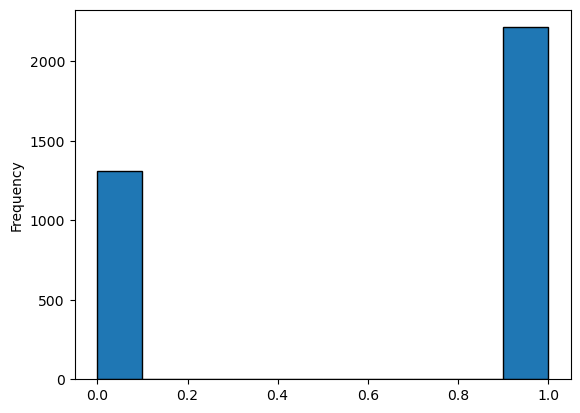

In [19]:
# confunder['age'].plot(kind='kde')
confunder['Female'].plot(kind='hist', edgecolor='black', xlabel='Femle')

In [9]:
import pandas as pd

path = "/home/preCNS/epigenome/dnaMethyl/aging/methy_3523.csv"
data = pd.read_csv(path, index_col =0)
data

,X15HanTZ0001,X15HanTZ0002,X15HanTZ0005,X15HanTZ0006,X15HanTZ0007,X15HanTZ0008,X15HanTZ0009,X15HanTZ0010,X15HanTZ0011,X15HanTZ0012,...,X19HanTZ1117,X19HanTZ1118,X19HanTZ1119,X19HanTZ1120,X19HanTZ1121,X19HanTZ1122,X19HanTZ1123,X19HanTZ1124,X19HanTZ1125,X19HanTZ1126
cg14817997,0.8874,0.4582,0.9268,0.7794,0.8143,0.6033,0.7716,0.8628,0.7045,0.8581,...,0.7938,0.8528,0.8261,0.6971,0.8908,0.8585,0.9051,0.6250,0.8625,0.7850
cg26928153,0.9503,0.9361,0.9327,0.9348,0.9238,0.9037,0.9307,0.9212,0.9155,0.9423,...,0.9360,0.9330,0.9239,0.9093,0.9056,0.9243,0.9368,0.9237,0.9264,0.9288
cg16269199,0.8810,0.8175,0.8466,0.8396,0.8148,0.7716,0.7968,0.8062,0.7799,0.8787,...,0.8630,0.8297,0.8120,0.8548,0.8090,0.8804,0.8676,0.7788,0.8029,0.8481
cg13869341,0.8307,0.8086,0.7985,0.8153,0.7802,0.7756,0.8169,0.8518,0.8363,0.7813,...,0.8358,0.7959,0.8069,0.8087,0.8865,0.8552,0.8794,0.8517,0.8475,0.8673
cg14008030,0.6312,0.5891,0.6593,0.6195,0.5600,0.5838,0.4770,0.6205,0.5617,0.5783,...,0.6399,0.5953,0.5246,0.5409,0.5394,0.5639,0.6238,0.5767,0.4816,0.5719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg06996138,0.0019,0.0021,0.0039,0.0039,0.0009,0.0000,0.0017,0.0006,0.0016,0.0061,...,0.0034,0.0080,0.0032,0.0068,0.0059,0.0048,0.0045,0.0060,0.0001,0.0009
cg16817496,0.3060,0.2095,0.2317,0.2481,0.2601,0.2124,0.2134,0.1830,0.2458,0.3086,...,0.2742,0.2375,0.2471,0.2582,0.2296,0.2328,0.2616,0.2366,0.2357,0.2286
cg05111475,0.9328,0.9551,0.9567,0.9449,0.9503,0.9433,0.9298,0.9355,0.9352,0.9683,...,0.9533,0.9574,0.9241,0.9079,0.9092,0.9326,0.9312,0.9416,0.9305,0.9287
cg07660283,0.7908,0.7577,0.8312,0.8153,0.7718,0.8200,0.6867,0.7346,0.8109,0.7618,...,0.7677,0.8002,0.7389,0.7611,0.7282,0.7990,0.7917,0.7997,0.6599,0.7794


In [10]:
dataT = data.T

In [11]:
dataT

,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,cg21870274,...,cg09007244,cg27124406,cg19565306,cg22012975,cg22531257,cg06996138,cg16817496,cg05111475,cg07660283,cg09226288
X15HanTZ0001,0.8874,0.9503,0.8810,0.8307,0.6312,0.1574,0.1771,0.4906,0.9564,0.6200,...,0.0113,0.0151,0.0220,0.0065,0.0091,0.0019,0.3060,0.9328,0.7908,0.6586
X15HanTZ0002,0.4582,0.9361,0.8175,0.8086,0.5891,0.1419,0.1603,0.5340,0.9683,0.6561,...,0.0072,0.0246,0.0223,0.0128,0.0163,0.0021,0.2095,0.9551,0.7577,0.7121
X15HanTZ0005,0.9268,0.9327,0.8466,0.7985,0.6593,0.1152,0.1530,0.4765,0.9472,0.6519,...,0.0151,0.0237,0.0338,0.0147,0.0030,0.0039,0.2317,0.9567,0.8312,0.7075
X15HanTZ0006,0.7794,0.9348,0.8396,0.8153,0.6195,0.1517,0.1816,0.4089,0.9498,0.6028,...,0.0134,0.0153,0.0284,0.0183,0.0149,0.0039,0.2481,0.9449,0.8153,0.7086
X15HanTZ0007,0.8143,0.9238,0.8148,0.7802,0.5600,0.1190,0.1612,0.5298,0.9810,0.6975,...,0.0113,0.0171,0.0218,0.0127,0.0065,0.0009,0.2601,0.9503,0.7718,0.6716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X19HanTZ1122,0.8585,0.9243,0.8804,0.8552,0.5639,0.1290,0.2092,0.5386,0.9574,0.7373,...,0.0115,0.0330,0.0467,0.0161,0.0130,0.0048,0.2328,0.9326,0.7990,0.7344
X19HanTZ1123,0.9051,0.9368,0.8676,0.8794,0.6238,0.1160,0.1231,0.6470,0.9580,0.7494,...,0.0106,0.0255,0.0331,0.0152,0.0193,0.0045,0.2616,0.9312,0.7917,0.7104
X19HanTZ1124,0.6250,0.9237,0.7788,0.8517,0.5767,0.1697,0.2004,0.6222,0.9731,0.6883,...,0.0136,0.0358,0.0366,0.0163,0.0218,0.0060,0.2366,0.9416,0.7997,0.7614
X19HanTZ1125,0.8625,0.9264,0.8029,0.8475,0.4816,0.1281,0.2005,0.5893,0.9746,0.7564,...,0.0071,0.0167,0.0294,0.0087,0.0058,0.0001,0.2357,0.9305,0.6599,0.7009


In [6]:
import yaml
with open('./config.yml', 'r') as file:
     root = yaml.safe_load(file)

pathCommon = root["pathway"]["common"]
pathControl3000  =  pathCommon.format("control3000MethylData.csv")
trainingData = pd.read_csv(pathControl3000, index_col="CpG")
trainingData = trainingData.T.dropna().astype(float)
trainingData

CpG,Age,cg05337607,cg16882684,cg10618823,cg05352250,cg14517133,cg18792365,cg22123915,cg16037806,cg05233311,...,cg14185104,cg12274479,cg03091027,cg23955417,cg15853117,cg08374499,cg12617598,cg05428701,cg00319545,cg23300267
GSM2333901,72.0,0.916,0.722,0.957,0.961,0.647,0.930,0.973,0.092,0.019,...,0.937,0.938,0.959,0.190,0.119,0.770,0.886,0.132,0.072,0.904
GSM2333902,55.0,0.954,0.598,0.964,0.951,0.664,0.884,0.961,0.077,0.016,...,0.870,0.918,0.932,0.185,0.099,0.652,0.870,0.203,0.081,0.868
GSM2333903,23.0,0.929,0.680,0.986,0.967,0.651,0.960,0.971,0.069,0.013,...,0.958,0.950,0.970,0.175,0.061,0.791,0.935,0.064,0.078,0.933
GSM2333904,86.0,0.931,0.653,0.975,0.967,0.725,0.929,0.971,0.071,0.019,...,0.934,0.942,0.949,0.247,0.106,0.707,0.908,0.249,0.089,0.844
GSM2333905,74.0,0.910,0.599,0.961,0.953,0.644,0.923,0.973,0.061,0.018,...,0.929,0.938,0.956,0.283,0.128,0.783,0.886,0.263,0.071,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796814021_R04C02,52.7,0.867,0.675,0.914,0.925,0.594,0.891,0.935,0.106,0.014,...,0.908,0.907,0.951,0.333,0.047,0.718,0.901,0.168,0.110,0.892
7796814021_R05C01,44.3,0.868,0.581,0.937,0.919,0.637,0.901,0.942,0.098,0.010,...,0.898,0.909,0.904,0.243,0.047,0.566,0.882,0.149,0.112,0.946
7796814021_R05C02,46.4,0.861,0.663,0.931,0.906,0.557,0.915,0.935,0.084,0.015,...,0.968,0.934,0.933,0.202,0.052,0.687,0.892,0.163,0.107,0.886
7796814021_R06C01,39.5,0.872,0.666,0.939,0.939,0.612,0.884,0.915,0.068,0.016,...,0.931,0.883,0.909,0.270,0.096,0.742,0.862,0.166,0.114,0.897


In [8]:
CpGInter = list(set(dataT.columns)&set(trainingData.columns))
len(CpGInter)

373845

In [22]:
test = dataT[CpGInter].dropna()
test

,cg03064241,cg07618462,cg16906375,cg10454246,cg12604181,cg19901523,cg14843337,cg23501962,cg07020176,cg13598881,...,cg09602753,cg12950753,cg25021530,cg27638432,cg13847226,cg15245038,cg03929741,cg24668061,cg21096907,cg06803184
X15HanTZ0001,0.0068,0.9704,0.0014,0.1117,0.0082,0.0605,0.8889,0.0689,0.7251,0.6197,...,0.9618,0.7498,0.3230,0.8905,0.8192,0.9254,0.0619,0.9827,0.2686,0.0120
X15HanTZ0002,0.0117,0.9769,0.0090,0.1620,0.0158,0.0626,0.9047,0.0610,0.7226,0.6044,...,0.9701,0.8091,0.2859,0.8828,0.8407,0.9455,0.0722,0.9891,0.3012,0.0147
X15HanTZ0005,0.0093,0.9839,0.0184,0.0805,0.0061,0.0188,0.8580,0.0685,0.7337,0.5919,...,0.9566,0.8153,0.3598,0.9159,0.8146,0.9223,0.0362,0.9738,0.2757,0.0175
X15HanTZ0006,0.0138,0.9837,0.0265,0.1528,0.0156,0.0723,0.9108,0.1300,0.7369,0.5814,...,0.9627,0.8073,0.3647,0.8992,0.8178,0.9380,0.0809,0.9829,0.2797,0.0195
X15HanTZ0007,0.0056,0.9703,0.0154,0.0796,0.0148,0.0221,0.9364,0.0646,0.8223,0.5630,...,0.9676,0.8249,0.3658,0.9369,0.8740,0.9528,0.0712,0.9827,0.2453,0.0117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X19HanTZ1122,0.0161,0.9665,0.0353,0.0612,0.0125,0.0297,0.9353,0.0671,0.8221,0.4980,...,0.9618,0.8264,0.3922,0.9165,0.8280,0.9405,0.0579,0.9747,0.2320,0.0209
X19HanTZ1123,0.0175,0.9653,0.0181,0.0696,0.0185,0.0268,0.9503,0.0707,0.8327,0.5665,...,0.9744,0.8424,0.3599,0.8990,0.8847,0.9441,0.0444,0.9805,0.3002,0.0181
X19HanTZ1124,0.0166,0.9655,0.0331,0.0877,0.0210,0.0402,0.9282,0.0524,0.8248,0.5614,...,0.9694,0.7203,0.3435,0.8837,0.8703,0.9491,0.0642,0.9730,0.2281,0.0181
X19HanTZ1125,0.0073,0.9831,0.0136,0.0696,0.0022,0.0370,0.9324,0.0592,0.7864,0.4632,...,0.9755,0.8179,0.3347,0.9335,0.8583,0.9473,0.0468,0.9912,0.2196,0.0134


In [13]:
confunder.index  = confunder["ID"]
dataT = confunder[["age"]].join(dataT)
dataT = dataT.rename(columns = {"age": "Age"})
dataT

,Age,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg09007244,cg27124406,cg19565306,cg22012975,cg22531257,cg06996138,cg16817496,cg05111475,cg07660283,cg09226288
ID,,,,,,,,,,,,,,,,,,,,,
X15HanTZ0001,50,0.8874,0.9503,0.8810,0.8307,0.6312,0.1574,0.1771,0.4906,0.9564,...,0.0113,0.0151,0.0220,0.0065,0.0091,0.0019,0.3060,0.9328,0.7908,0.6586
X15HanTZ0002,49,0.4582,0.9361,0.8175,0.8086,0.5891,0.1419,0.1603,0.5340,0.9683,...,0.0072,0.0246,0.0223,0.0128,0.0163,0.0021,0.2095,0.9551,0.7577,0.7121
X15HanTZ0005,67,0.9268,0.9327,0.8466,0.7985,0.6593,0.1152,0.1530,0.4765,0.9472,...,0.0151,0.0237,0.0338,0.0147,0.0030,0.0039,0.2317,0.9567,0.8312,0.7075
X15HanTZ0006,63,0.7794,0.9348,0.8396,0.8153,0.6195,0.1517,0.1816,0.4089,0.9498,...,0.0134,0.0153,0.0284,0.0183,0.0149,0.0039,0.2481,0.9449,0.8153,0.7086
X15HanTZ0007,56,0.8143,0.9238,0.8148,0.7802,0.5600,0.1190,0.1612,0.5298,0.9810,...,0.0113,0.0171,0.0218,0.0127,0.0065,0.0009,0.2601,0.9503,0.7718,0.6716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X19HanTZ1122,22,0.8585,0.9243,0.8804,0.8552,0.5639,0.1290,0.2092,0.5386,0.9574,...,0.0115,0.0330,0.0467,0.0161,0.0130,0.0048,0.2328,0.9326,0.7990,0.7344
X19HanTZ1123,21,0.9051,0.9368,0.8676,0.8794,0.6238,0.1160,0.1231,0.6470,0.9580,...,0.0106,0.0255,0.0331,0.0152,0.0193,0.0045,0.2616,0.9312,0.7917,0.7104
X19HanTZ1124,31,0.6250,0.9237,0.7788,0.8517,0.5767,0.1697,0.2004,0.6222,0.9731,...,0.0136,0.0358,0.0366,0.0163,0.0218,0.0060,0.2366,0.9416,0.7997,0.7614


In [14]:
dataTT = dataT.T
dataTT["CpG"] = dataTT.index


ID,X15HanTZ0001,X15HanTZ0002,X15HanTZ0005,X15HanTZ0006,X15HanTZ0007,X15HanTZ0008,X15HanTZ0009,X15HanTZ0010,X15HanTZ0011,X15HanTZ0012,...,X19HanTZ1117,X19HanTZ1118,X19HanTZ1119,X19HanTZ1120,X19HanTZ1121,X19HanTZ1122,X19HanTZ1123,X19HanTZ1124,X19HanTZ1125,X19HanTZ1126
Age,50.0000,49.0000,67.0000,63.0000,56.0000,53.0000,64.0000,48.0000,61.0000,60.0000,...,21.0000,21.0000,26.0000,22.0000,31.0000,22.0000,21.0000,31.0000,26.0000,26.0000
cg14817997,0.8874,0.4582,0.9268,0.7794,0.8143,0.6033,0.7716,0.8628,0.7045,0.8581,...,0.7938,0.8528,0.8261,0.6971,0.8908,0.8585,0.9051,0.6250,0.8625,0.7850
cg26928153,0.9503,0.9361,0.9327,0.9348,0.9238,0.9037,0.9307,0.9212,0.9155,0.9423,...,0.9360,0.9330,0.9239,0.9093,0.9056,0.9243,0.9368,0.9237,0.9264,0.9288
cg16269199,0.8810,0.8175,0.8466,0.8396,0.8148,0.7716,0.7968,0.8062,0.7799,0.8787,...,0.8630,0.8297,0.8120,0.8548,0.8090,0.8804,0.8676,0.7788,0.8029,0.8481
cg13869341,0.8307,0.8086,0.7985,0.8153,0.7802,0.7756,0.8169,0.8518,0.8363,0.7813,...,0.8358,0.7959,0.8069,0.8087,0.8865,0.8552,0.8794,0.8517,0.8475,0.8673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg06996138,0.0019,0.0021,0.0039,0.0039,0.0009,0.0000,0.0017,0.0006,0.0016,0.0061,...,0.0034,0.0080,0.0032,0.0068,0.0059,0.0048,0.0045,0.0060,0.0001,0.0009
cg16817496,0.3060,0.2095,0.2317,0.2481,0.2601,0.2124,0.2134,0.1830,0.2458,0.3086,...,0.2742,0.2375,0.2471,0.2582,0.2296,0.2328,0.2616,0.2366,0.2357,0.2286
cg05111475,0.9328,0.9551,0.9567,0.9449,0.9503,0.9433,0.9298,0.9355,0.9352,0.9683,...,0.9533,0.9574,0.9241,0.9079,0.9092,0.9326,0.9312,0.9416,0.9305,0.9287
cg07660283,0.7908,0.7577,0.8312,0.8153,0.7718,0.8200,0.6867,0.7346,0.8109,0.7618,...,0.7677,0.8002,0.7389,0.7611,0.7282,0.7990,0.7917,0.7997,0.6599,0.7794


In [ ]:
dataTT["CpG"] = dataTT.index
dataTT.to_csv("/home/lipan230/code/pathwayAgeReduceRAMusage/data/WSJ.csv", index = False)

In [36]:
test = test.rename(columns = {"age": "Age"})
test.dropna()

,Age,cg03064241,cg07618462,cg16906375,cg10454246,cg12604181,cg19901523,cg14843337,cg23501962,cg07020176,...,cg09602753,cg12950753,cg25021530,cg27638432,cg13847226,cg15245038,cg03929741,cg24668061,cg21096907,cg06803184
ID,,,,,,,,,,,,,,,,,,,,,
X15HanTZ0001,50,0.0068,0.9704,0.0014,0.1117,0.0082,0.0605,0.8889,0.0689,0.7251,...,0.9618,0.7498,0.3230,0.8905,0.8192,0.9254,0.0619,0.9827,0.2686,0.0120
X15HanTZ0002,49,0.0117,0.9769,0.0090,0.1620,0.0158,0.0626,0.9047,0.0610,0.7226,...,0.9701,0.8091,0.2859,0.8828,0.8407,0.9455,0.0722,0.9891,0.3012,0.0147
X15HanTZ0005,67,0.0093,0.9839,0.0184,0.0805,0.0061,0.0188,0.8580,0.0685,0.7337,...,0.9566,0.8153,0.3598,0.9159,0.8146,0.9223,0.0362,0.9738,0.2757,0.0175
X15HanTZ0006,63,0.0138,0.9837,0.0265,0.1528,0.0156,0.0723,0.9108,0.1300,0.7369,...,0.9627,0.8073,0.3647,0.8992,0.8178,0.9380,0.0809,0.9829,0.2797,0.0195
X15HanTZ0007,56,0.0056,0.9703,0.0154,0.0796,0.0148,0.0221,0.9364,0.0646,0.8223,...,0.9676,0.8249,0.3658,0.9369,0.8740,0.9528,0.0712,0.9827,0.2453,0.0117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X19HanTZ1122,22,0.0161,0.9665,0.0353,0.0612,0.0125,0.0297,0.9353,0.0671,0.8221,...,0.9618,0.8264,0.3922,0.9165,0.8280,0.9405,0.0579,0.9747,0.2320,0.0209
X19HanTZ1123,21,0.0175,0.9653,0.0181,0.0696,0.0185,0.0268,0.9503,0.0707,0.8327,...,0.9744,0.8424,0.3599,0.8990,0.8847,0.9441,0.0444,0.9805,0.3002,0.0181
X19HanTZ1124,31,0.0166,0.9655,0.0331,0.0877,0.0210,0.0402,0.9282,0.0524,0.8248,...,0.9694,0.7203,0.3435,0.8837,0.8703,0.9491,0.0642,0.9730,0.2281,0.0181


In [34]:
testT = test.T
# testT["CpG"] = testT.index
testT

ID,X15HanTZ0001,X15HanTZ0002,X15HanTZ0005,X15HanTZ0006,X15HanTZ0007,X15HanTZ0008,X15HanTZ0009,X15HanTZ0010,X15HanTZ0011,X15HanTZ0012,...,X19HanTZ1117,X19HanTZ1118,X19HanTZ1119,X19HanTZ1120,X19HanTZ1121,X19HanTZ1122,X19HanTZ1123,X19HanTZ1124,X19HanTZ1125,X19HanTZ1126
Age,50.0000,49.0000,67.0000,63.0000,56.0000,53.0000,64.0000,48.0000,61.0000,60.0000,...,21.0000,21.0000,26.0000,22.0000,31.0000,22.0000,21.0000,31.0000,26.0000,26.0000
cg03064241,0.0068,0.0117,0.0093,0.0138,0.0056,0.0155,0.0071,0.0071,0.0151,0.0155,...,0.0066,0.0197,0.0049,0.0084,0.0086,0.0161,0.0175,0.0166,0.0073,0.0093
cg07618462,0.9704,0.9769,0.9839,0.9837,0.9703,0.9875,0.9733,0.9914,0.9876,0.9763,...,0.9674,0.9730,0.9614,0.9790,0.9768,0.9665,0.9653,0.9655,0.9831,0.9712
cg16906375,0.0014,0.0090,0.0184,0.0265,0.0154,0.0166,0.0154,0.0038,0.0149,0.0037,...,0.0121,0.0255,0.0178,0.0248,0.0206,0.0353,0.0181,0.0331,0.0136,0.0064
cg10454246,0.1117,0.1620,0.0805,0.1528,0.0796,0.0830,0.1002,0.0883,0.1794,0.1543,...,0.0746,0.0520,0.0997,0.1199,0.0972,0.0612,0.0696,0.0877,0.0696,0.0633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg15245038,0.9254,0.9455,0.9223,0.9380,0.9528,0.9480,0.9373,0.9613,0.9415,0.9015,...,0.9655,0.9320,0.9461,0.9086,0.9622,0.9405,0.9441,0.9491,0.9473,0.9421
cg03929741,0.0619,0.0722,0.0362,0.0809,0.0712,0.0705,0.0681,0.0617,0.0675,0.0526,...,0.0720,0.0397,0.0775,0.0560,0.0978,0.0579,0.0444,0.0642,0.0468,0.0850
cg24668061,0.9827,0.9891,0.9738,0.9829,0.9827,0.9859,0.9881,0.9882,0.9869,0.9798,...,0.9804,0.9905,0.9823,0.9836,0.9873,0.9747,0.9805,0.9730,0.9912,0.9885
cg21096907,0.2686,0.3012,0.2757,0.2797,0.2453,0.2800,0.2149,0.2499,0.2431,0.2420,...,0.2911,0.2363,0.2309,0.2651,0.2355,0.2320,0.3002,0.2281,0.2196,0.2469


In [35]:
testT.dropna()
testT

ID,X15HanTZ0001,X15HanTZ0002,X15HanTZ0005,X15HanTZ0006,X15HanTZ0007,X15HanTZ0008,X15HanTZ0009,X15HanTZ0010,X15HanTZ0011,X15HanTZ0012,...,X19HanTZ1117,X19HanTZ1118,X19HanTZ1119,X19HanTZ1120,X19HanTZ1121,X19HanTZ1122,X19HanTZ1123,X19HanTZ1124,X19HanTZ1125,X19HanTZ1126
Age,50.0000,49.0000,67.0000,63.0000,56.0000,53.0000,64.0000,48.0000,61.0000,60.0000,...,21.0000,21.0000,26.0000,22.0000,31.0000,22.0000,21.0000,31.0000,26.0000,26.0000
cg03064241,0.0068,0.0117,0.0093,0.0138,0.0056,0.0155,0.0071,0.0071,0.0151,0.0155,...,0.0066,0.0197,0.0049,0.0084,0.0086,0.0161,0.0175,0.0166,0.0073,0.0093
cg07618462,0.9704,0.9769,0.9839,0.9837,0.9703,0.9875,0.9733,0.9914,0.9876,0.9763,...,0.9674,0.9730,0.9614,0.9790,0.9768,0.9665,0.9653,0.9655,0.9831,0.9712
cg16906375,0.0014,0.0090,0.0184,0.0265,0.0154,0.0166,0.0154,0.0038,0.0149,0.0037,...,0.0121,0.0255,0.0178,0.0248,0.0206,0.0353,0.0181,0.0331,0.0136,0.0064
cg10454246,0.1117,0.1620,0.0805,0.1528,0.0796,0.0830,0.1002,0.0883,0.1794,0.1543,...,0.0746,0.0520,0.0997,0.1199,0.0972,0.0612,0.0696,0.0877,0.0696,0.0633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg15245038,0.9254,0.9455,0.9223,0.9380,0.9528,0.9480,0.9373,0.9613,0.9415,0.9015,...,0.9655,0.9320,0.9461,0.9086,0.9622,0.9405,0.9441,0.9491,0.9473,0.9421
cg03929741,0.0619,0.0722,0.0362,0.0809,0.0712,0.0705,0.0681,0.0617,0.0675,0.0526,...,0.0720,0.0397,0.0775,0.0560,0.0978,0.0579,0.0444,0.0642,0.0468,0.0850
cg24668061,0.9827,0.9891,0.9738,0.9829,0.9827,0.9859,0.9881,0.9882,0.9869,0.9798,...,0.9804,0.9905,0.9823,0.9836,0.9873,0.9747,0.9805,0.9730,0.9912,0.9885
cg21096907,0.2686,0.3012,0.2757,0.2797,0.2453,0.2800,0.2149,0.2499,0.2431,0.2420,...,0.2911,0.2363,0.2309,0.2651,0.2355,0.2320,0.3002,0.2281,0.2196,0.2469


In [29]:
testT.to_csv("/home/lipan230/code/pathwayAgeReduceRAMusage/data/WSJBasedOnD3K.csv", index = False)

In [3]:
import yaml
import pandas as pd 
with open('./config.yml', 'r') as file:
     root = yaml.safe_load(file)

pathCommon = root["pathway"]["common"]
# SchizophreniaResult = root["pathway"]["resultDemo"]
SchizophreniaResult = root["pathway"]["SchizophreniaResult"]

path = SchizophreniaResult.format('RidgeAnalysis/WSJ/WSJPrediction.csv')
data = pd.read_csv(path, index_col = 0)
data

,prediction,Age
X15HanTZ0001,45.324410,50.0
X15HanTZ0002,44.937059,49.0
X15HanTZ0005,59.186931,67.0
X15HanTZ0006,55.220335,63.0
X15HanTZ0007,49.895826,56.0
...,...,...
X19HanTZ1122,14.668544,22.0
X19HanTZ1123,11.907105,21.0
X19HanTZ1124,23.480726,31.0
X19HanTZ1125,22.575716,26.0


In [5]:
mean_squared_error, mean_absolute_error, r2_score, dataCorr = evaluation(data)
print("mean_squared_error: {}".format(mean_squared_error))
print("mean_absolute_error: {}".format(mean_absolute_error))
print("r2_score: {}".format(r2_score))
print("correlation: {}".format(dataCorr))

mean_squared_error: 32.645820870936234
mean_absolute_error: 4.9308020472727545
r2_score: 0.9313925188919526
correlation: 0.9650867934501816


In [1]:
import pandas as pd
WSJDataPath = "/home/lipan230/code/pathwayAgeReduceRAMusage/data/WSJ.csv" 
WSJData = pd.read_csv(WSJDataPath, index_col="CpG")
methylData = WSJData.T.dropna().astype(float)

In [4]:
methylData

CpG,Age,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg09007244,cg27124406,cg19565306,cg22012975,cg22531257,cg06996138,cg16817496,cg05111475,cg07660283,cg09226288
X15HanTZ0001,50.0,0.8874,0.9503,0.8810,0.8307,0.6312,0.1574,0.1771,0.4906,0.9564,...,0.0113,0.0151,0.0220,0.0065,0.0091,0.0019,0.3060,0.9328,0.7908,0.6586
X15HanTZ0002,49.0,0.4582,0.9361,0.8175,0.8086,0.5891,0.1419,0.1603,0.5340,0.9683,...,0.0072,0.0246,0.0223,0.0128,0.0163,0.0021,0.2095,0.9551,0.7577,0.7121
X15HanTZ0005,67.0,0.9268,0.9327,0.8466,0.7985,0.6593,0.1152,0.1530,0.4765,0.9472,...,0.0151,0.0237,0.0338,0.0147,0.0030,0.0039,0.2317,0.9567,0.8312,0.7075
X15HanTZ0006,63.0,0.7794,0.9348,0.8396,0.8153,0.6195,0.1517,0.1816,0.4089,0.9498,...,0.0134,0.0153,0.0284,0.0183,0.0149,0.0039,0.2481,0.9449,0.8153,0.7086
X15HanTZ0007,56.0,0.8143,0.9238,0.8148,0.7802,0.5600,0.1190,0.1612,0.5298,0.9810,...,0.0113,0.0171,0.0218,0.0127,0.0065,0.0009,0.2601,0.9503,0.7718,0.6716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X19HanTZ1122,22.0,0.8585,0.9243,0.8804,0.8552,0.5639,0.1290,0.2092,0.5386,0.9574,...,0.0115,0.0330,0.0467,0.0161,0.0130,0.0048,0.2328,0.9326,0.7990,0.7344
X19HanTZ1123,21.0,0.9051,0.9368,0.8676,0.8794,0.6238,0.1160,0.1231,0.6470,0.9580,...,0.0106,0.0255,0.0331,0.0152,0.0193,0.0045,0.2616,0.9312,0.7917,0.7104
X19HanTZ1124,31.0,0.6250,0.9237,0.7788,0.8517,0.5767,0.1697,0.2004,0.6222,0.9731,...,0.0136,0.0358,0.0366,0.0163,0.0218,0.0060,0.2366,0.9416,0.7997,0.7614
X19HanTZ1125,26.0,0.8625,0.9264,0.8029,0.8475,0.4816,0.1281,0.2005,0.5893,0.9746,...,0.0071,0.0167,0.0294,0.0087,0.0058,0.0001,0.2357,0.9305,0.6599,0.7009


In [5]:
import numpy as np
import pandas as pd

JJ = pd.read_csv("/home/lipan230/variable_v1.csv")
JJ.index = JJ["id"]
JJSub =  JJ[["CH_TIME_14","CI_TIME_14"]]
JJSub[JJSub <= 0] = np.nan

/tmp/ipykernel_3626097/3500119622.py:1: DtypeWarning: Columns (2,15,18,19,38,54,56,88,102,116,139,141,143,155,157) have mixed types. Specify dtype option on import or set low_memory=False.
  JJ = pd.read_csv("/home/lipan230/variable_v1.csv")


,gender,age,birthd,work_t_06,edu_06,wor_e_06,smoke_06,h_str_06,sbp_06,dbp_06,...,insom_a,insom_b,snore,CH_t,ch,CI_t,ci,CH_TIME_14,CI_TIME_14,AGE_14
0,1.0,53.292266,1-Jan-54,2.0,5.0,1.0,4.0,1.0,150.7,94.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-54.041096
1,1.0,44.640657,1-Sep-62,1.0,5.0,1.0,1.0,1.0,119.3,79.3,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-1375,-1375,51.961644
2,0.0,36.391513,1-Jan-71,2.0,5.0,1.0,1.0,1.0,120.0,80.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-1374,-1374,43.591781
3,1.0,34.494182,21-Oct-72,2.0,5.0,1.0,3.0,1.0,119.3,79.3,...,NaN,NaN,0.0,4-Nov-08,1.0,NaN,NaN,-68,-1375,41.805479
4,1.0,25.615332,11-Oct-81,2.0,5.0,1.0,3.0,1.0,110.7,70.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-1375,-1375,32.841096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000


In [2]:
import numpy as np
import pandas as pd

JJ = pd.read_csv("/home/lipan230/variable_v1.csv")
JJ.index = JJ["id"]
JJSub =  JJ[["CH_TIME_14","CI_TIME_14"]]
JJSub[JJSub <= 0] = np.nan
JJSub['stroke_time_14'] = JJSub[["CH_TIME_14","CI_TIME_14"]].min(axis=1)

# Define your conditions and corresponding values
conditions = [
    (JJSub['CH_TIME_14'] < JJSub['CI_TIME_14']),  # Condition 1
    (JJSub['CH_TIME_14'] > JJSub['CI_TIME_14'] ),
    (JJSub['CH_TIME_14'] == JJSub['CI_TIME_14'] ),# Condition 2
]
values = [1, 2, 3]

# Use np.select to create the new column 'New_Column' based on the conditions and values
JJSub['state_14'] = np.select(conditions, values, default=np.nan)

# Display the resulting DataFrame
JJSub

/tmp/ipykernel_3633560/2982265366.py:4: DtypeWarning: Columns (2,15,18,19,38,54,56,88,102,116,139,141,143,155,157) have mixed types. Specify dtype option on import or set low_memory=False.
  JJ = pd.read_csv("/home/lipan230/variable_v1.csv")
/tmp/ipykernel_3633560/2982265366.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JJSub[JJSub <= 0] = np.nan
/tmp/ipykernel_3633560/2982265366.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JJSub[JJSub <= 0] = np.nan
/tmp/ipykernel_3633560/2982265366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

,CH_TIME_14,CI_TIME_14,stroke_time_14,state_14
id,,,,
8.0,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN
12.0,NaN,NaN,NaN,NaN
14.0,NaN,NaN,NaN,NaN
16.0,NaN,NaN,NaN,NaN
...,...,...,...,...
NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN


In [5]:
data = pd.concat([JJ, JJSub], axis = 1)
data.to_csv("/home/lipan230/variable_v1_pan.csv")

In [30]:
JJSub['stroke_time_14'] = JJSub[["CH_TIME_14","CI_TIME_14"]].min(axis=1)
JJSub.dropna().head(20)

,CH_TIME_14,CI_TIME_14,stroke_time_14
id,,,
4638.0,30.0,30.0,30.0
4980.0,1389.0,1389.0,1389.0
5150.0,1307.0,1306.0,1306.0
7202.0,1326.0,1434.0,1326.0
7810.0,1295.0,1410.0,1295.0
8468.0,1419.0,1419.0,1419.0
9440.0,46.0,46.0,46.0
11080.0,30.0,30.0,30.0
13940.0,47.0,47.0,47.0


In [31]:
JJSub

,CH_TIME_14,CI_TIME_14,stroke_time_14
id,,,
8.0,NaN,NaN,NaN
10.0,NaN,NaN,NaN
12.0,NaN,NaN,NaN
14.0,NaN,NaN,NaN
16.0,NaN,NaN,NaN
...,...,...,...
13155318.0,NaN,NaN,NaN
13156590.0,NaN,NaN,NaN
13158714.0,NaN,NaN,NaN


In [34]:

# Define your conditions and corresponding values
conditions = [
    (JJSub['CH_TIME_14'] < JJSub['CI_TIME_14']),  # Condition 1
    (JJSub['CH_TIME_14'] > JJSub['CI_TIME_14'] ),
    (JJSub['CH_TIME_14'] == JJSub['CI_TIME_14'] ),# Condition 2
]
values = [1, 2, 3]

# Use np.select to create the new column 'New_Column' based on the conditions and values
JJSub['state_14'] = np.select(conditions, values, default=np.nan)

# Display the resulting DataFrame
JJSub

,CH_TIME_14,CI_TIME_14,stroke_time_14,state_14
id,,,,
8.0,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN
12.0,NaN,NaN,NaN,NaN
14.0,NaN,NaN,NaN,NaN
16.0,NaN,NaN,NaN,NaN
...,...,...,...,...
13155318.0,NaN,NaN,NaN,NaN
13156590.0,NaN,NaN,NaN,NaN
13158714.0,NaN,NaN,NaN,NaN


In [35]:
JJSub.dropna()

,CH_TIME_14,CI_TIME_14,stroke_time_14,state_14
id,,,,
4638.0,30.0,30.0,30.0,3.0
4980.0,1389.0,1389.0,1389.0,3.0
5150.0,1307.0,1306.0,1306.0,2.0
7202.0,1326.0,1434.0,1326.0,1.0
7810.0,1295.0,1410.0,1295.0,1.0
...,...,...,...,...
12407598.0,1335.0,1329.0,1329.0,2.0
12408076.0,1427.0,1427.0,1427.0,3.0
12469016.0,1402.0,1402.0,1402.0,3.0
